In [0]:
# General libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Libraries for autoencoding
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
# Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the image data and normalizing
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Try different sizes!
size_hidden_layer = 20

In [0]:
# Encoder with just one hidden layer
class Encoder(Sequential):
    def __init__(self):
        super().__init__()

        self.add(Flatten(input_shape=(28, 28)))
        self.add(Dense(size_hidden_layer, activation='relu'))

In [0]:
# Decoder with a dense layer with 28x28 units.
class Decoder(Sequential):
    def __init__(self):
        super().__init__()

        self.add(Dense(784,   activation='sigmoid',
                       input_shape=[size_hidden_layer]))
        self.add(Reshape([28, 28]))

In [0]:
encoder = Encoder()
decoder = Decoder()

In [0]:
# Autoencoder can be created as a sequential model with
# encoder and decoder.
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'mean_squared_error',
                    optimizer= SGD(1.5),
                    metrics=['accuracy'])

In [8]:
# Note that here X_test is not obligatory.
autoencoder_hidden_layer_results = autoencoder.fit(X_train, X_train,
                                                   epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.1061
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0405 - accuracy: 0.1734
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.1973
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.2092
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0278 - accuracy: 0.2171


In [0]:
# Prediction for the first 10 images
X_rec_autoencoder = autoencoder.predict(X_test[:10])
# This will show the difference between the prediction
# and the original data
diff_autoencoder = X_rec_autoencoder - X_test[:10]

Now, let's do the same for PCA:

In [0]:
X_train = X_train.reshape([X_train.shape[0], X_train.shape[1] * X_train.shape[2]])
X_test = X_test.reshape([X_test.shape[0], X_test.shape[1] * X_test.shape[2]])

In [0]:
n_components = 20

pca = PCA(n_components=n_components)
pca.fit(X_train)

num_elements = X_test.shape[0]
X_test_PCA = pca.fit_transform(X_test)

In [0]:
X_rec_pca = pca.inverse_transform(X_test_PCA)

In [0]:
X_rec_pca = np.reshape(X_rec_pca[:10], (10,28,28))
X_test = np.reshape(X_test[:10], (10,28,28))
# This will show the difference between the prediction
# and the original data
diff_pca = X_rec_pca - X_test

In [0]:
# Function for plotting the data and results
def plotter(data, title):
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(10):
        ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(data[i], 
                cmap=plt.cm.binary, interpolation='nearest')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(title, fontsize='medium')

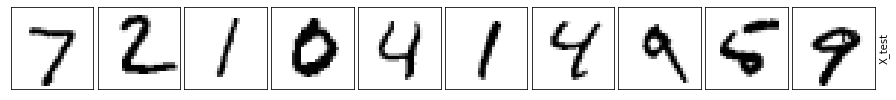

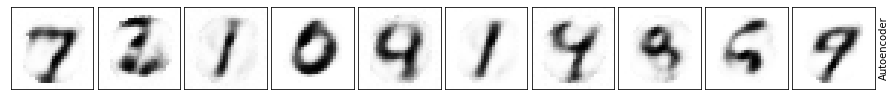

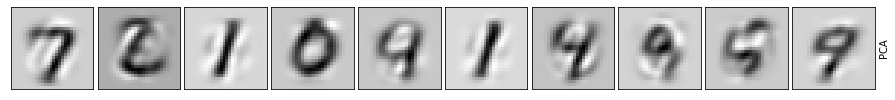

In [18]:
# Now let's see how the predictions look
# Along with the difference from the original
plotter(X_test,'X_test')
plotter(X_rec_autoencoder,'Autoencoder')
plotter(X_rec_pca,'PCA')